<a href="https://colab.research.google.com/github/HayateSato/DS_Practice/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some bacis notes

```
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"],
        color='b', marker='o', linestyle='--')
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"],
        color='r', marker='v', linestyle='--')

```





- Adding Markers:
 "o" for circles and "v" for downward-pointing triangles.
- Line Styles:
 "-" for solid line, "--" for dashed lines,
- Colors:
 'b' for blue and 'r' for red
- Axis Labels and Titles:
```
ax.set_xlabel("Time (months)")
ax.set_ylabel("Precipitation (inches)")
ax.set_title("Weather patterns in Austin and Seattle")
```

Time series

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

csv_url = "https://ocw.mit.edu/courses/15-071-the-analytics-edge-spring-2017/3b53e75d1ddb97bd98f40ae5bbee2475_climate_change.csv"


csv_file = pd.read_csv(csv_url,
                      #  parse_dates=["Year"], ### parse_dates will convert the specified col into dates format
                      #  index_col="Year"
                       )


print(csv_file.shape)
print(csv_file.head(3))
# print(csv_file.columns.tolist())
print(csv_file.info())


(308, 11)
   Year  Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12        TSI  \
0  1983      5  2.556  345.96  1638.59  303.677  191.324  350.113  1366.1024   
1  1983      6  2.167  345.52  1633.71  303.746  192.057  351.848  1366.1208   
2  1983      7  1.741  344.15  1633.22  303.795  192.818  353.725  1366.2850   

   Aerosols   Temp  
0    0.0863  0.109  
1    0.0794  0.118  
2    0.0731  0.137  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp   

In [3]:
csv_file["year-month"] = csv_file["Year"].astype(str) + '-' + csv_file["Month"].astype(str)
csv_file["year-month"] = pd.to_datetime(csv_file["year-month"])
csv_file.set_index("year-month", inplace=True)
csv_file.drop(columns=["Year", "Month"], inplace=True)
csv_file.head()
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308 entries, 1983-05-01 to 2008-12-01
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MEI       308 non-null    float64
 1   CO2       308 non-null    float64
 2   CH4       308 non-null    float64
 3   N2O       308 non-null    float64
 4   CFC-11    308 non-null    float64
 5   CFC-12    308 non-null    float64
 6   TSI       308 non-null    float64
 7   Aerosols  308 non-null    float64
 8   Temp      308 non-null    float64
dtypes: float64(9)
memory usage: 24.1 KB


In [4]:
# csv_file[:, "year-month"] =

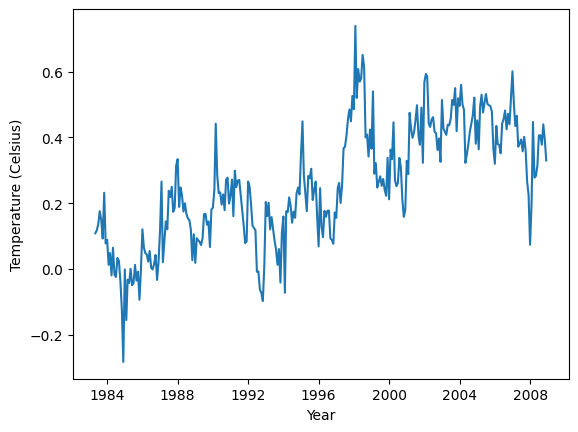

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()  # or ax = plt.axes()

ax.plot(csv_file.index, csv_file["Temp"]) # if index is time-series, you can just use as x axis

ax.set_xlabel("Year")
ax.set_ylabel("Temperature (Celsius)")

plt.show()

Zooming in 90s

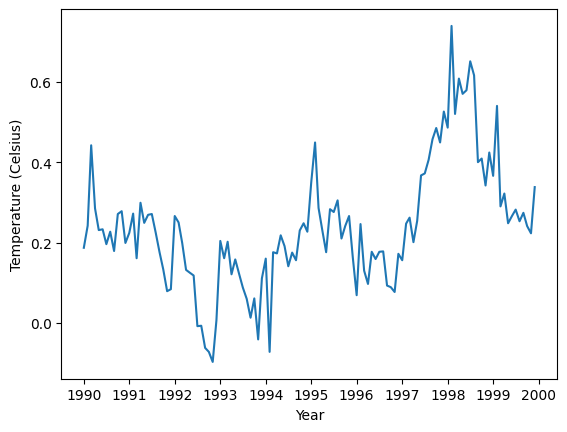

In [6]:
fig, ax = plt.subplots()
nineties = csv_file["1990":"1999"]

ax.plot(nineties.index, nineties["Temp"])
ax.set_xlabel("Year")
ax.set_ylabel("Temperature (Celsius)")
plt.show()

Plotting two different y axis

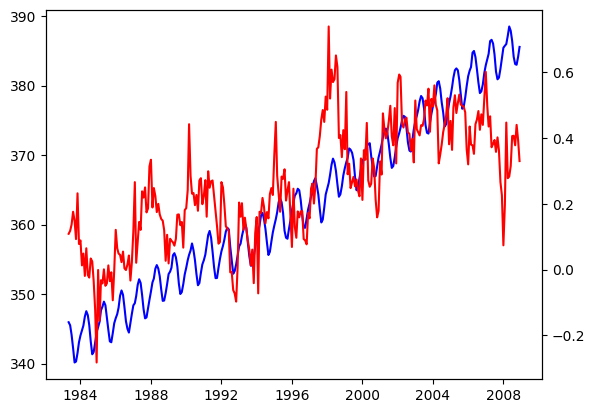

In [7]:

# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(csv_file.index, csv_file["CO2"], color="b")

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(csv_file.index, csv_file["Temp"], color="r")

plt.show()

defining function

In [8]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

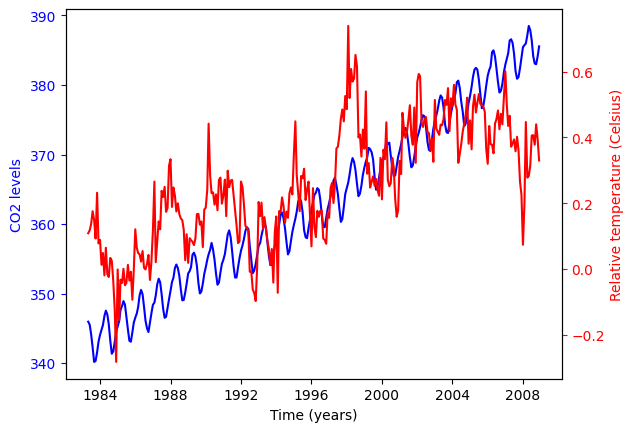

In [9]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, csv_file.index, csv_file["CO2"], "blue", "Time (years)", "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, csv_file.index, csv_file["Temp"], "red", "Time (years)", "Relative temperature (Celsius)")

plt.show()

Annotation

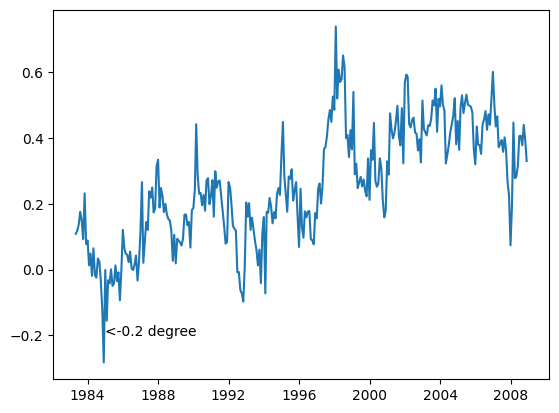

In [10]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(csv_file.index, csv_file["Temp"])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate('<-0.2 degree', (pd.Timestamp('1985-01-01'), -0.2))

plt.show()

In [11]:
import os
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
path = f'/content/drive/MyDrive/Colab Notebooks/Dataset_DSPractice'
os.chdir(path)
os.listdir(path)

['Athletes.xlsx',
 'Medals.xlsx',
 'Datacamp',
 'CountriesWithMostMedals.png',
 'CountriesWithMostMedals_14x8.png']

In [13]:
medal = pd.read_excel('Medals.xlsx')
medal.head(3)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5


In [14]:
medal = medal.sort_values(by="Rank")
medal.head(10)

medals = medal.iloc[:10]
medals = medals.set_index("Rank")
medals.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team/NOC       10 non-null     object
 1   Gold           10 non-null     int64 
 2   Silver         10 non-null     int64 
 3   Bronze         10 non-null     int64 
 4   Total          10 non-null     int64 
 5   Rank by Total  10 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 560.0+ bytes


<ipython-input-15-5b4d5c0a72b1>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals["Team/NOC"], rotation=90)


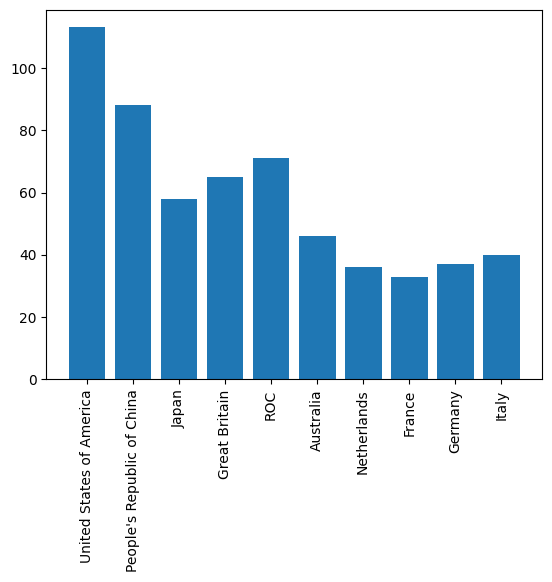

In [15]:
fig, ax  = plt.subplots()
ax.bar(medals["Team/NOC"], medals["Total"])
ax.set_xticklabels(medals["Team/NOC"], rotation=90)
plt.show()

Stacking bar plot

<ipython-input-16-7544b31afeef>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals["Team/NOC"], rotation=90)


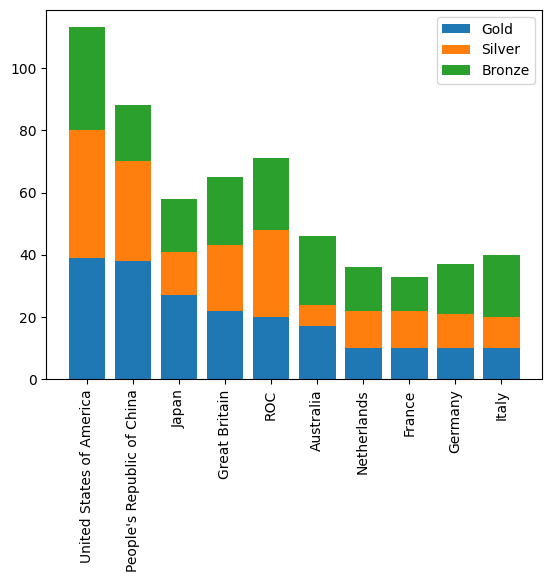

In [16]:
fig, ax  = plt.subplots()



# Add bars for "Gold" with the label "Gold"
ax.bar(medals["Team/NOC"], medals["Gold"], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals["Team/NOC"], medals["Silver"], bottom=medals["Gold"], label="Silver")  ### Use bottom=NameofColumn for stacking
# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals["Team/NOC"], medals["Bronze"], bottom=medals["Gold"] + medals["Silver"], label="Bronze")

ax.set_xticklabels(medals["Team/NOC"], rotation=90)

# Display the legend
ax.legend()

plt.show()


In [17]:
fig.savefig("CountriesWithMostMedals.png")

In [18]:
fig.set_size_inches([14, 8])
fig.savefig("CountriesWithMostMedals_14x8.png")

In [19]:
athletes = pd.read_excel('Athletes.xlsx')
athletes.head(3)

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing


In [20]:
# fig, ax = plt.subplots()
# # Plot a histogram of "Weight" for mens_rowing
# ax.hist(mens_rowing["Weight"])

# # Compare to histogram of "Weight" for mens_gymnastics
# ax.hist(mens_gymnastics["Weight"])

# # Set the x-axis label to "Weight (kg)"
# ax.set_xlabel("Weight(Kg)")

# # Set the y-axis label to "# of observations"
# ax.set_ylabel("# of observations")

# plt.show()


Seaborn
=====

In [21]:
import seaborn as sns

In [22]:
csv_file

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
year-month,,,,,,,,,
1983-05-01,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1983-06-01,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
1983-07-01,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
1983-08-01,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
1983-09-01,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...
2008-08-01,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
2008-09-01,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
2008-10-01,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440


In [23]:
medal.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [24]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=medal)

MessageError: Error: credential propagation was unsuccessful

<ipython-input-25-bf6754ccf94a>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medal["Team/NOC"], rotation=90)


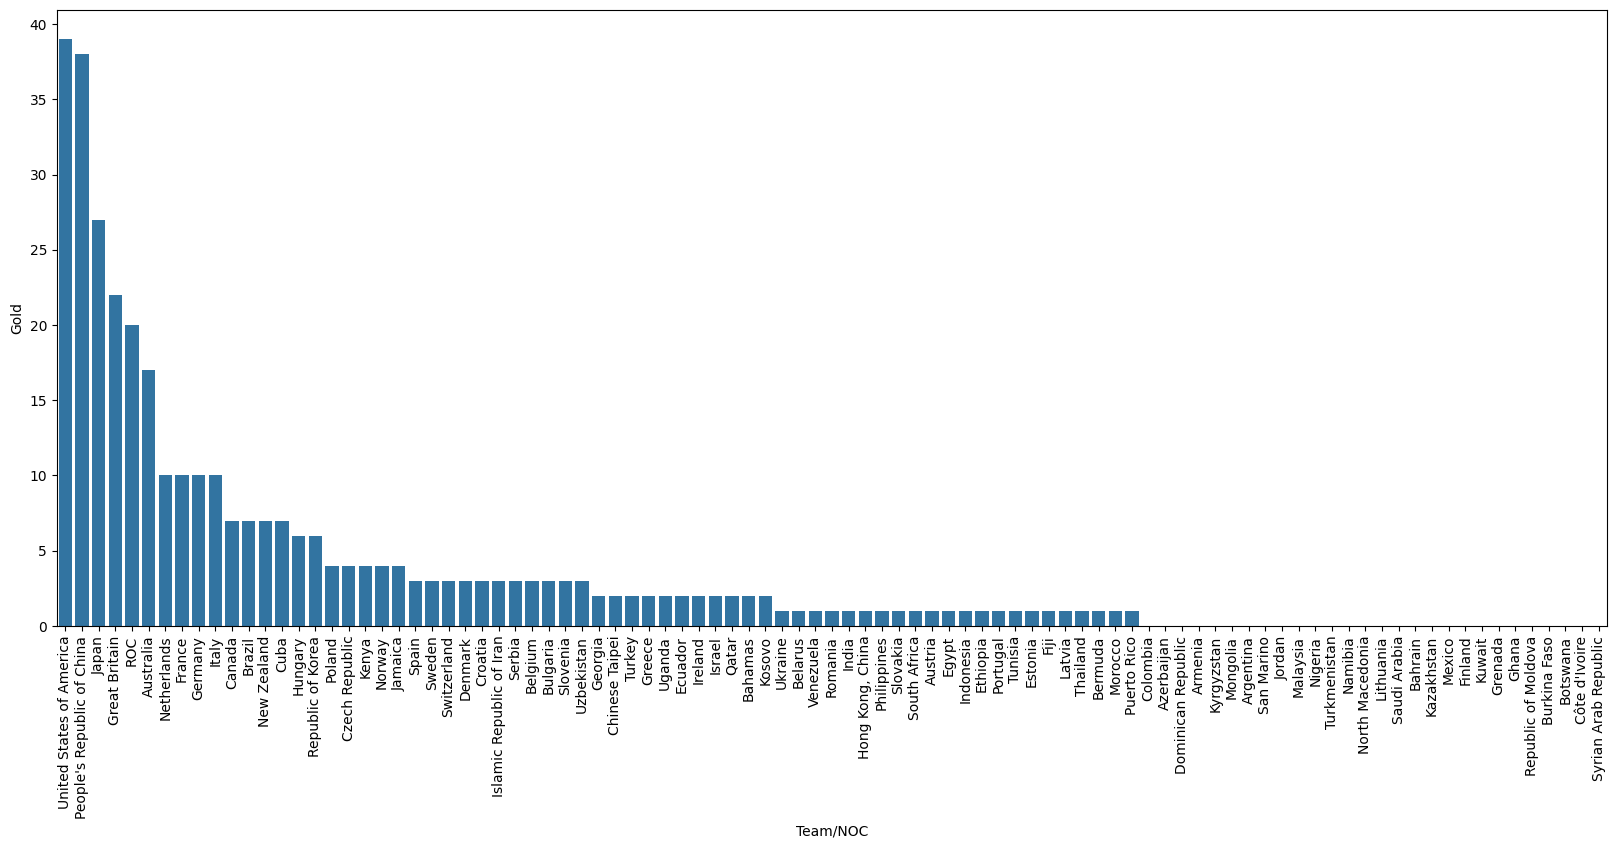

In [25]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x="Team/NOC", y="Gold", data=medal)
ax.set_xticklabels(medal["Team/NOC"], rotation=90)
plt.show()

In [26]:
csv_file.head()

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
year-month,,,,,,,,,
1983-05-01,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1983-06-01,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
1983-07-01,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
1983-08-01,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
1983-09-01,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


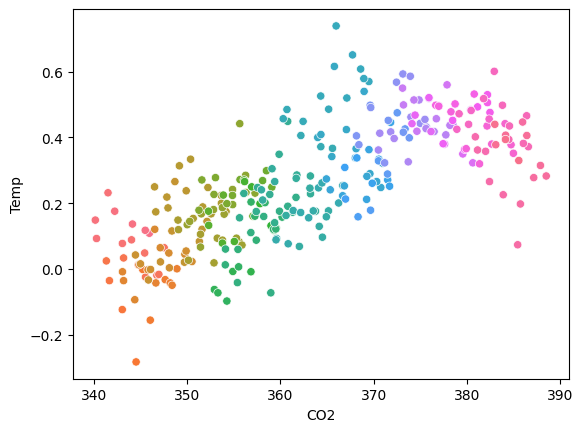

In [31]:
sns.scatterplot(x="CO2", y="Temp", hue=csv_file.index, data=csv_file, legend=False)
plt.show()